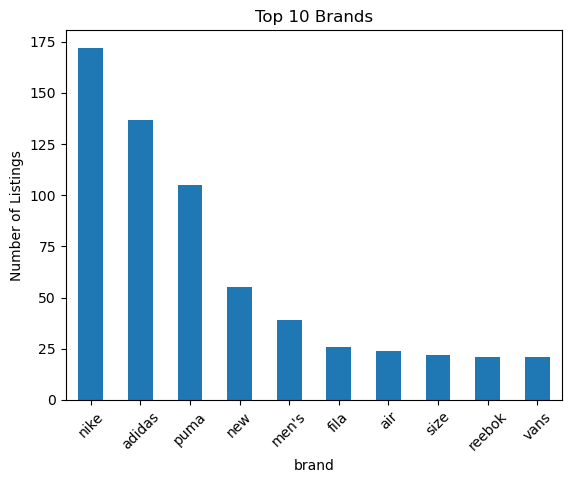

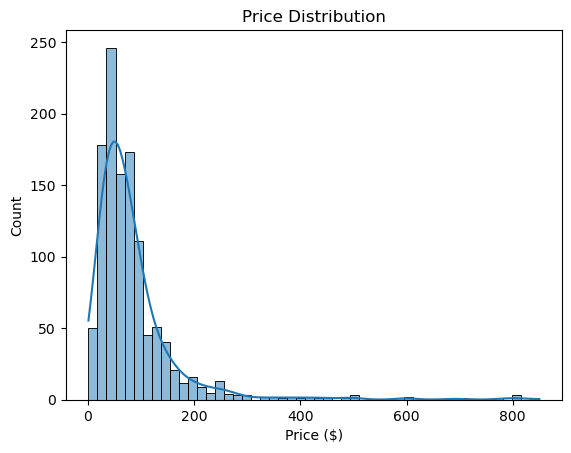

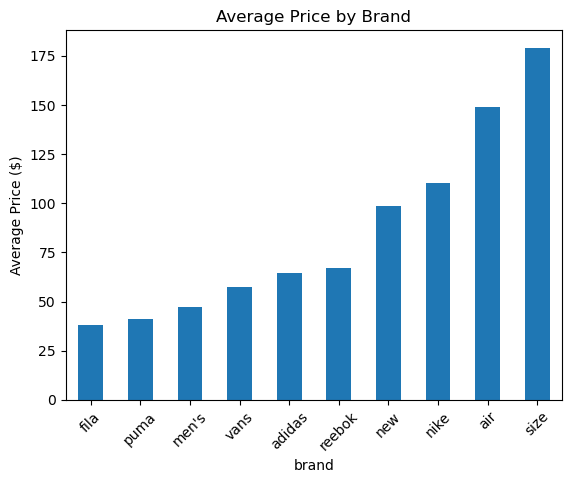

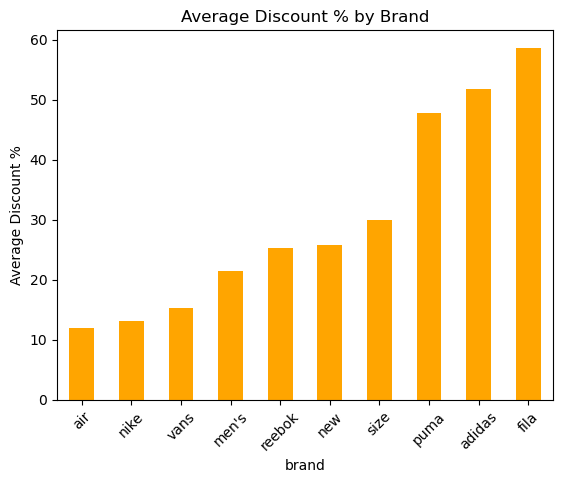

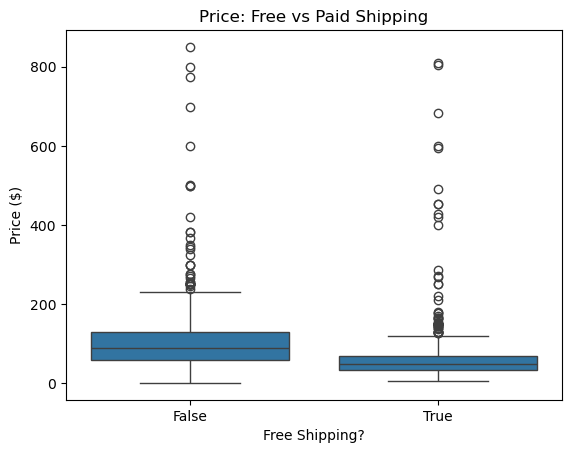

title     brand  price  \
579   diadora Game Row Cut Metal Lace Up Mens Beige,...   diadora  14.99   
685   Diamond Supply Co. Native Trek Mens Brown Snea...   diamond  19.99   
534   Drew Rocket 44991-14 Mens Black Narrow Leather...      drew  27.25   
676           Fitflop Mens Andor High Top Sneaker Shoes   fitflop  19.99   
784   Fila Original Tennis LUX 1TM01770-126 Mens Bei...      fila  28.99   
356   Drew Thrust 40998-43 Mens Gray Canvas Lace Up ...      drew  31.01   
825   Drew Player 40105-41 Mens Blue Canvas Lace Up ...      drew  30.07   
663   Diesel S-Principia Low Y02739-P4083-H1527 Mens...    diesel  38.53   
988   Altama Urban Low 334751 Mens Black Canvas Lace...    altama  28.99   
513   PUMA Spirex Premium Lace Up Mens Beige Sneaker...      puma  34.99   
271   Bates Rush Shield Mid Vent E01047 Mens Black A...     bates  33.99   
182   Nautilus Steel Toe Electric Hazard WP N2208 Me...  nautilus  28.99   
135   Fila Speedserve Energized Tennis Mens Black Sn...      fila  32.85   
768               adidas men Louisville Swingman Jersey    adidas  23.00   
13                   adidas women Break Start Mid Shoes    adidas  20.00   
995            adidas women AdiFOM Superstar Boot Shoes    adidas  31.00   
952   Carolina Align Voltrex Composite Toe Hi Mens B...  carolina  38.53   
348   Nautilus Accelerator Oxford Carbon Toe ESD Men...  nautilus  28.99   
457   PUMA Sf Vis2k Lace Up Mens Black Sneakers Casu...      puma  34.99   
1000  Skechers Mens Louvin Gray Walking Shoes Size 1...  skechers  35.19   

      discount_pct  rating_num         shipping  
579           85.0         NaN    Free delivery  
685           85.0         NaN    Free delivery  
534           84.0         NaN    Free delivery  
676           82.0         NaN  +$4.99 delivery  
784           81.0         NaN    Free delivery  
356           81.0         NaN    Free delivery  
825           80.0         NaN    Free delivery  
663           80.0         NaN    Free delivery  
988           78.0         NaN    Free delivery  
513           77.0         NaN    Free delivery  
271           76.0         NaN    Free delivery  
182           75.0         NaN    Free delivery  
135           75.0         NaN    Free delivery  
768           74.0         NaN    Free delivery  
13            73.0         NaN    Free delivery  
995           72.0         NaN    Free delivery  
952           72.0         NaN    Free delivery  
348           71.0         NaN    Free delivery  
457           71.0         NaN    Free delivery  
1000          71.0         NaN  +$9.99 delivery

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../data/ebay_cleaned.csv")

# Show basic stats
df.describe()

# Top 10 brands by number of listings
top_brands = df["brand"].value_counts().head(10)
top_brands.plot(kind="bar", title="Top 10 Brands", ylabel="Number of Listings")
plt.xticks(rotation=45)
plt.show()

# Price distribution
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.show()

# Average price per top brand
avg_price = df[df["brand"].isin(top_brands.index)].groupby("brand")["price"].mean()
avg_price.sort_values().plot(kind="bar", title="Average Price by Brand")
plt.xticks(rotation=45)
plt.ylabel("Average Price ($)")
plt.show()

# Discount % by brand
avg_discount = df[df["brand"].isin(top_brands.index)].groupby("brand")["discount_pct"].mean()
avg_discount.sort_values().plot(kind="bar", title="Average Discount % by Brand", color="orange")
plt.xticks(rotation=45)
plt.ylabel("Average Discount %")
plt.show()

# Effect of shipping
df["free_shipping"] = df["shipping"].str.lower().str.contains("free")
sns.boxplot(data=df, x="free_shipping", y="price")
plt.title("Price: Free vs Paid Shipping")
plt.xlabel("Free Shipping?")
plt.ylabel("Price ($)")
plt.show()

# Best deal finder
# Criteria: high discount, low price, decent rating
deal_df = df[(df["discount_pct"] >= 40) & (df["price"] <= df["price"].quantile(0.25))]
deal_df = deal_df.sort_values(by=["discount_pct", "price"], ascending=[False, True])
deal_df[["title", "brand", "price", "discount_pct", "rating_num", "shipping"]].head(20)


In [4]:
top10 = df['brand'].value_counts().head(10).index
avg_disc = (
    df[df['brand'].isin(top10)]
    .groupby('brand')['discount_pct']
    .mean()
    .reset_index()
    .sort_values('discount_pct', ascending=False)
)

import altair as alt
alt.Chart(avg_disc).mark_bar().encode(
    x='brand',
    y='discount_pct',
    tooltip=['discount_pct']
).properties(title='Average Discount % (Top 10 Brands)')


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [7]:
box_data = df[df['brand'].isin(top10)]
alt.Chart(box_data).mark_boxplot(extent='min-max').encode(
    x='brand:N',
    y='price:Q'
).properties(title='Price Distribution per Brand (Top 10)')


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.Chart(...)

In [11]:
import pandas as pd
import altair as alt
import numpy as np

# 1. Make discount & rating bins
bins_disc   = [0,10,20,30,40,50,100]
bins_rating = [0,1,2,3,4,5]

heat = (
    df
    .assign(
        disc_bin   = pd.cut(df["discount_pct"], bins=bins_disc, right=False),
        rating_bin = pd.cut(df["rating_num"],   bins=bins_rating, right=False)
    )
    .groupby(["disc_bin", "rating_bin"], observed=False)  # future-proof
    .size()
    .reset_index(name="count")
)

# 2. Convert Interval objects â†’ strings
heat["disc_bin"]   = heat["disc_bin"].astype(str)
heat["rating_bin"] = heat["rating_bin"].astype(str)

# 3. Build chart
alt.Chart(heat).mark_rect().encode(
    x=alt.X("disc_bin:N", title="Discount % bin"),
    y=alt.Y("rating_bin:N", title="Rating bin"),
    color="count:Q",
    tooltip=["count:Q"]
).properties(title="Listings by Discount vs Rating")


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [15]:
import re

# Create free_shipping and shipping_cost columns
df["free_shipping"] = df["shipping"].str.lower().str.contains("free", na=False)

df["shipping_cost"] = df["shipping"].apply(
    lambda s: 0
    if pd.isna(s) or "free" in str(s).lower()
    else float(re.search(r"\d+\.?\d*", s).group())
         if re.search(r"\d+\.?\d*", str(s)) else None
)


In [17]:
scatter = (
    alt.Chart(df.dropna(subset=["shipping_cost"]))
    .mark_circle(size=40)
    .encode(
        x="shipping_cost",
        y="price",
        color="free_shipping:N",
        tooltip=["title", "price", "shipping_cost"]
    )
    .interactive()
)

scatter


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.Chart(...)